In [9]:
import torch
import numpy as np
import torchvision
import torchvision.datasets as datasets
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn as sk
import random

random.seed(1)

In [10]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [11]:
train_len = len(trainset)
test_len = len(testset)
index = list(range(train_len))
print(train_len, test_len)

50000 10000


In [12]:
#construct validation set (lets use 10 percent)
np.random.shuffle(index)
#number of blocks of data
split = int(0.4 * train_len)
set1_index = index[0:split]
set2_index = index[split:2*split]
val_index = index[2*split:]
#Need to use a dataloader to control batch size and also enable SGD
set1_loader = torch.utils.data.DataLoader(trainset, sampler = set1_index, batch_size = 10, num_workers = 10)
set2_loader = torch.utils.data.DataLoader(trainset, sampler = set2_index, batch_size = 10, num_workers = 10)
val_loader = torch.utils.data.DataLoader(trainset, sampler = val_index,batch_size = 10, num_workers = 10)
test_loader = torch.utils.data.DataLoader(testset)
index2 = list(range(test_len))
np.random.shuffle(index2)
split2 = int(0.1 * test_len)
test_index = index2[0:split2]
test_loader = torch.utils.data.DataLoader(testset, sampler = test_index)

In [13]:
print(len(set1_index))
print(len(set2_index))
print(len(test_index))

20000
20000
1000


In [14]:
#dataset only for testing don't run this piece of code if it's not necessary
split = int(0.2*train_len)
set1_index = index[0:split]
set2_index = index[split:2*split]
val_index = index[2*split:3*split]
index2 = list(range(test_len))
np.random.shuffle(index2)
split2 = int(0.03 * test_len)
test_index = index2[0:split2]
print(len(set1_index))
print(len(set2_index))
print(len(test_index))
set1_loader = torch.utils.data.DataLoader(trainset, sampler = set1_index, batch_size = 10, num_workers = 10)
set2_loader = torch.utils.data.DataLoader(trainset, sampler = set2_index, batch_size = 10, num_workers = 10)
val_loader = torch.utils.data.DataLoader(trainset, sampler = val_index, batch_size = 10, num_workers = 10)
test_loader = torch.utils.data.DataLoader(testset, sampler = test_index)

10000
10000
300


In [15]:
#dataset only for testing don't run this piece of code if it's not necessary
split = int(0.02*train_len)
set1_index = index[0:split]
set2_index = index[split:2*split]
val_index = index[2*split:3*split]
index2 = list(range(test_len))
np.random.shuffle(index2)
split2 = int(0.03 * test_len)
test_index = index2[0:split2]
print(len(set1_index))
print(len(set2_index))
print(len(test_index))
set1_loader = torch.utils.data.DataLoader(trainset, sampler = set1_index, batch_size = 10, num_workers = 10)
set2_loader = torch.utils.data.DataLoader(trainset, sampler = set2_index, batch_size = 10, num_workers = 10)
val_loader = torch.utils.data.DataLoader(trainset, sampler = val_index, batch_size = 10, num_workers = 10)
test_loader = torch.utils.data.DataLoader(testset, sampler = test_index)

1000
1000
300


In [16]:
set1dataiter = iter(set1_loader)
set1images, set1labels = set1dataiter.next()
set2dataiter = iter(set2_loader)
set2images, set2labels = set2dataiter.next()
valdataiter = iter(val_loader)
valimages, vallabels = valdataiter.next()

In [17]:
class CNNBlock1(nn.Module):
    def __init__(self):
        super(CNNBlock1, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size = 3)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x),2))
        return x
cnnblock1 = CNNBlock1()

In [18]:
class CNNBlock2(nn.Module):
    def __init__(self):
        super(CNNBlock2, self).__init__()
        self.conv3 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size = 4, padding = 1)
    
    def forward(self, x):
        x = F.relu(self.conv3(x))
        x = F.relu(F.max_pool2d(self.conv4(x),2))
        return x
cnnblock2 = CNNBlock2()

In [19]:
class CNNBlock3(nn.Module):
    def __init__(self):
        super(CNNBlock3, self).__init__()
        self.conv5 = nn.Conv2d(128, 128, kernel_size = 3, padding = 1)
        self.conv6 = nn.Conv2d(128, 256, kernel_size = 2)
    
    def forward(self, x):
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        return x
cnnblock3 = CNNBlock3()

In [20]:
class MLPBlock1(nn.Module):
    def __init__(self):
        super(MLPBlock1, self).__init__()
        self.fc1 = nn.Linear(15*15*32, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 15*15*32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
mlpblock1 = MLPBlock1()

In [21]:
class MLPBlock2(nn.Module):
    def __init__(self):
        super(MLPBlock2, self).__init__()
        self.fc4 = nn.Linear(7*7*128, 256)
        self.fc5 = nn.Linear(256, 64)
        self.fc6 = nn.Linear(64,10)
    
    def forward(self, x):
        x = x.view(-1, 7*7*128)
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x
mlpblock2 = MLPBlock2()

In [22]:
class MLPBlock3(nn.Module):
    def __init__(self):
        super(MLPBlock3, self).__init__()
        self.fc7 = nn.Linear(6*6*256, 256)
        self.fc8 = nn.Linear(256, 64)
        self.fc9 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 6*6*256)
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return x
mlpblock3 = MLPBlock3()

In [23]:
class EnsembleModel(nn.Module):
    def __init__(self):
        super(EnsembleModel, self).__init__()
        self.cnnblock1 = cnnblock1
        self.cnnblock2 = cnnblock2
        self.cnnblock3 = cnnblock3
        self.mlpblock1 = mlpblock1
        self.mlpblock2 = mlpblock2
        self.mlpblock3 = mlpblock3
    
    def forward(self, x):
        x1 = self.cnnblock1(x)
        x2 = self.cnnblock2(x1)
        x3 = self.cnnblock3(x2)
        x4 = self.mlpblock1(x1)
        x5 = self.mlpblock2(x2)
        x6 = self.mlpblock3(x3)
        x7 = x4 + x5 + x6
        return F.log_softmax(x7, dim=1)

ensemblemodel = EnsembleModel()

In [24]:
optimizer = optim.SGD(ensemblemodel.parameters(), lr = 0.05)

In [25]:
criterion = nn.CrossEntropyLoss()

In [26]:
trainingloss = []
trainingloss_noisy = []
validationloss = []
testaccuracy = []
for epoch in range(51):

    if epoch % 2 == 0:
        for param in cnnblock1.parameters():
            param.requires_grad_(False)
        
        for param in cnnblock2.parameters():
            param.requires_grad_(False)
        
        for param in cnnblock3.parameters():
            param.requires_grad_(False)
        
        for param in mlpblock1.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock2.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock3.parameters():
            param.requires_grad_(True)
        
        running_loss = 0.0
        for i, data in enumerate(set2_loader,0):
            inputs, set2labels = data
            
            optimizer.zero_grad()
            
            outputs = ensemblemodel(inputs)
            loss = criterion(outputs, set2labels)
            loss.backward()
            optimizer.step()
            
            #print stats
            running_loss += loss.item()
            if i%100 == 99:
                print('[%d,%5d] training loss: %.3f' % (epoch+1, i + 1, running_loss / 100))
                trainingloss.append(running_loss/100)
                trainingloss_noisy.append(running_loss/100)
                running_loss = 0.0
                
                
    else:
        for param in cnnblock1.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock2.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock3.parameters():
            param.requires_grad_(True)
        
        for param in mlpblock1.parameters():
            param.requires_grad_(False)
            
        for param in mlpblock2.parameters():
            param.requires_grad_(False)
            
        for param in mlpblock3.parameters():
            param.requires_grad_(False)
        
        running_loss = 0.0
        
        for i, data in enumerate(set1_loader,0):
            inputs, set1labels = data
            
            optimizer.zero_grad()
            
            outputs = ensemblemodel(inputs)
            loss = criterion(outputs, set1labels)
            loss.backward()
            optimizer.step()
            
            #print stats
            running_loss += loss.item()
            if i%100 == 99:
                print('[%d,%5d] training loss: %.3f' % (epoch+1, i + 1, running_loss / 100))
                trainingloss_noisy.append(running_loss/100)
                running_loss = 0.0
                

    running_loss2 = 0.0
    
    for i, data in enumerate(val_loader):
            inputs,vallabels = data
            outputs = ensemblemodel(inputs)
            lloss = criterion(outputs, vallabels)
            
            running_loss2 += lloss.item()
            if i%100 == 99:
                print('[%d,%5d] validation loss: %.3f' % (epoch+1, i + 1, running_loss2 / 100))
                validationloss.append(running_loss2/100)
                running_loss2 = 0.0
                
                
    correct_count, all_count = 0, 0
    for inp,labels in test_loader:
      for i in range(len(labels)):
        with torch.no_grad():
            logps = ensemblemodel(inp)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
          correct_count += 1
        all_count += 1

    print("\nModel Accuracy =", (correct_count/all_count))
    testaccuracy.append(correct_count/all_count)
                
                
print('Finished Training')
print(trainingloss)
print(trainingloss_noisy)
print(validationloss)
print(testaccuracy)

[1,  100] training loss: 2.305
[1,  100] validation loss: 2.295

Model Accuracy = 0.08666666666666667
[2,  100] training loss: 2.290
[2,  100] validation loss: 2.282

Model Accuracy = 0.11333333333333333
[3,  100] training loss: 2.213
[3,  100] validation loss: 2.173

Model Accuracy = 0.19333333333333333
[4,  100] training loss: 2.106
[4,  100] validation loss: 2.067

Model Accuracy = 0.26666666666666666
[5,  100] training loss: 2.038
[5,  100] validation loss: 2.015

Model Accuracy = 0.27666666666666667
[6,  100] training loss: 1.995
[6,  100] validation loss: 1.961

Model Accuracy = 0.30666666666666664
[7,  100] training loss: 1.927
[7,  100] validation loss: 1.937

Model Accuracy = 0.29
[8,  100] training loss: 1.942
[8,  100] validation loss: 1.910

Model Accuracy = 0.30333333333333334
[9,  100] training loss: 1.853
[9,  100] validation loss: 1.894

Model Accuracy = 0.30333333333333334
[10,  100] training loss: 1.909
[10,  100] validation loss: 1.866

Model Accuracy = 0.33666666666

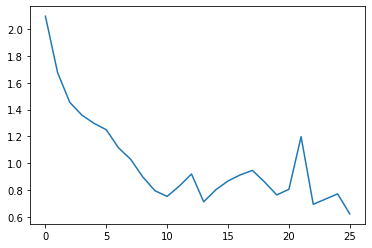

In [18]:
plt.plot(trainingloss)
plt.savefig('medium_param_l_t.png')

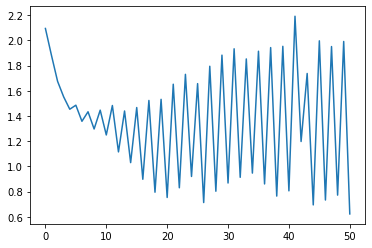

In [19]:
plt.plot(trainingloss_noisy)

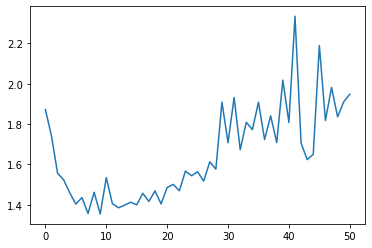

In [20]:
plt.plot(validationloss)

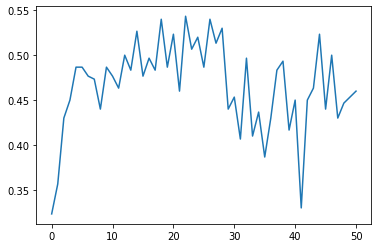

In [21]:
plt.plot(testaccuracy)
plt.savefig('medium_param_l_test.png')

In [27]:
correct_count, all_count = 0, 0
for inp,labels in test_loader:
  for i in range(len(labels)):
    with torch.no_grad():
        logps = ensemblemodel(inp)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 300

Model Accuracy = 0.31333333333333335


In [28]:
class EnsembleModel2(nn.Module):
    def __init__(self):
        super(EnsembleModel2, self).__init__()
        self.cnnblock1 = cnnblock1
        self.cnnblock2 = cnnblock2
        self.cnnblock3 = cnnblock3
        self.mlpblock1 = mlpblock1
        self.mlpblock2 = mlpblock2
        self.mlpblock3 = mlpblock3
    
    def forward(self, x):
        x1 = self.cnnblock1(x)
        x2 = self.cnnblock2(x1)
        x3 = self.cnnblock3(x2)
        x4 = self.mlpblock1(x1)
        x5 = self.mlpblock2(x2)
        x6 = self.mlpblock3(x3)
        x7 = x4 + x5 + x6
        return F.log_softmax(x7, dim=1)

ensemblemodel2 = EnsembleModel2()

In [29]:
optimizer2 = optim.SGD(ensemblemodel2.parameters(), lr = 0.05)

In [30]:
trainingloss2 = []
validationloss2 = []
testaccuracy2 = []
for epoch in range(51):
    
    if epoch % 2 == 0:
        for param in cnnblock1.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock2.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock3.parameters():
            param.requires_grad_(True)
        
        for param in mlpblock1.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock2.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock3.parameters():
            param.requires_grad_(True)
        
        running_loss = 0.0
        for i, data in enumerate(set2_loader,0):
            inputs, set2labels = data
            
            optimizer2.zero_grad()
            
            outputs = ensemblemodel2(inputs)
            loss = criterion(outputs, set2labels)
            loss.backward()
            optimizer2.step()
            
            #print stats
            running_loss += loss.item()
            if i%100 == 99:
                print('[%d,%5d] loss: %.3f' % (epoch+1, i + 1, running_loss / 100))
                running_loss = 0.0
                
    else:
        for param in cnnblock1.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock2.parameters():
            param.requires_grad_(True)
        
        for param in cnnblock3.parameters():
            param.requires_grad_(True)
        
        for param in mlpblock1.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock2.parameters():
            param.requires_grad_(True)
            
        for param in mlpblock3.parameters():
            param.requires_grad_(True)
        
        running_loss = 0.0
        
        for i, data in enumerate(set1_loader,0):
            inputs, set1labels = data
            
            optimizer2.zero_grad()
            
            outputs = ensemblemodel2(inputs)
            loss = criterion(outputs, set1labels)
            loss.backward()
            optimizer2.step()
            
            #print stats
            running_loss += loss.item()
            if i%100 == 99:
                print('[%d,%5d] loss: %.3f' % (epoch+1, i + 1, running_loss / 100))
                trainingloss2.append(running_loss/100)
                running_loss = 0.0

    running_loss2 = 0.0
    
    for i, data in enumerate(val_loader):
            inputs,vallabels = data
            outputs = ensemblemodel2(inputs)
            lloss = criterion(outputs, vallabels)
            
            running_loss2 += lloss.item()
            if i%100 == 99:
                print('[%d,%5d] validation loss: %.3f' % (epoch+1, i + 1, running_loss2 / 100))
                validationloss2.append(running_loss2/100)
                running_loss2 = 0.0
    
    
    
    correct_count, all_count = 0, 0
    for inp,labels in test_loader:
      for i in range(len(labels)):
        with torch.no_grad():
            logps = ensemblemodel2(inp)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
          correct_count += 1
        all_count += 1

    print("\nModel Accuracy =", (correct_count/all_count))
    testaccuracy2.append(correct_count/all_count)                
                
                
print('Finished Training')
print(trainingloss)
print(validationloss)
print(testaccuracy)

[1,  100] loss: 0.938
[1,  100] validation loss: 2.603

Model Accuracy = 0.36
[2,  100] loss: 1.694
[2,  100] validation loss: 1.729

Model Accuracy = 0.3566666666666667
[3,  100] loss: 0.666
[3,  100] validation loss: 2.667

Model Accuracy = 0.38333333333333336
[4,  100] loss: 1.370
[4,  100] validation loss: 1.737

Model Accuracy = 0.39666666666666667
[5,  100] loss: 0.479
[5,  100] validation loss: 2.982

Model Accuracy = 0.38666666666666666
[6,  100] loss: 1.068
[6,  100] validation loss: 1.863

Model Accuracy = 0.36666666666666664
[7,  100] loss: 0.332
[7,  100] validation loss: 3.468

Model Accuracy = 0.4033333333333333
[8,  100] loss: 0.801
[8,  100] validation loss: 2.205

Model Accuracy = 0.37666666666666665
[9,  100] loss: 0.231
[9,  100] validation loss: 3.544

Model Accuracy = 0.41
[10,  100] loss: 0.668
[10,  100] validation loss: 2.524

Model Accuracy = 0.3933333333333333
[11,  100] loss: 0.265
[11,  100] validation loss: 3.686

Model Accuracy = 0.4166666666666667
[12,  1

In [31]:
correct_count, all_count = 0, 0
for inp,labels in test_loader:
  for i in range(len(labels)):
    with torch.no_grad():
        logps = ensemblemodel2(inp)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 1000

Model Accuracy = 0.6


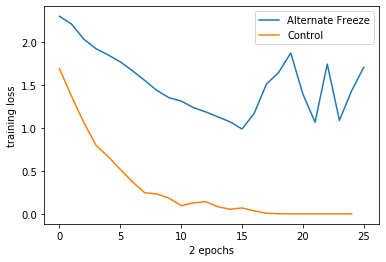

In [31]:
plt.plot(trainingloss)
plt.plot(trainingloss2)
plt.legend(["Alternate Freeze", "Control"])
plt.xlabel("2 epochs")
plt.ylabel("training loss")
plt.savefig('medium_param_small_set_training_loss')

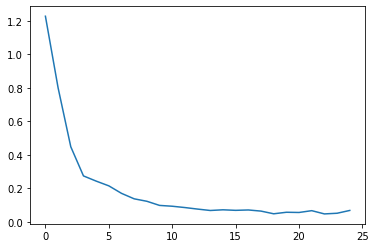

In [32]:
plt.plot(trainingloss)
plt.savefig('true_medium_param_m_l.png')

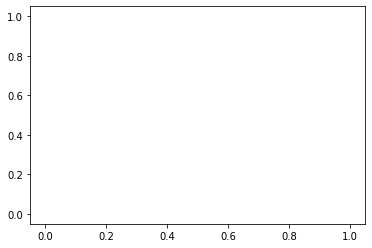

In [33]:
plt.plot(validationloss)
plt.savefig('true_medium_param_l_v.png')

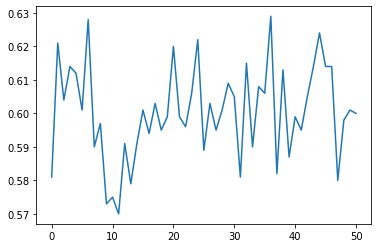

In [34]:
plt.plot(testaccuracy)
plt.savefig('true_medium_param_l_test.png')

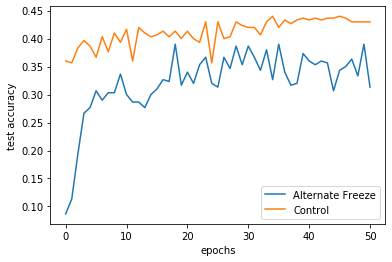

In [32]:
plt.plot(testaccuracy)
plt.plot(testaccuracy2)
plt.legend(["Alternate Freeze", "Control"])
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.savefig('medium_param_small_set_test_accuracy')